In [1]:
# Status of passengers (Ages, Gender, Class) in relation to cabin class (where they are from)

# Who was alone and who was with family

# What facotrs helped someone survive the incident

import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

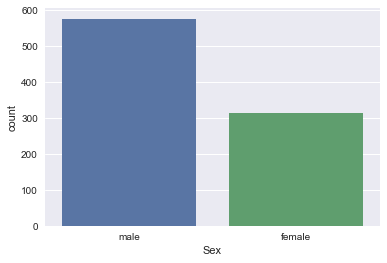

In [15]:
sns.countplot('Sex',data=titanic_df)

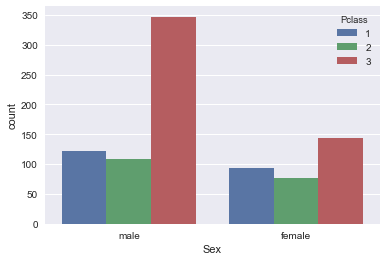

In [17]:
sns.countplot('Sex',data=titanic_df,hue='Pclass')

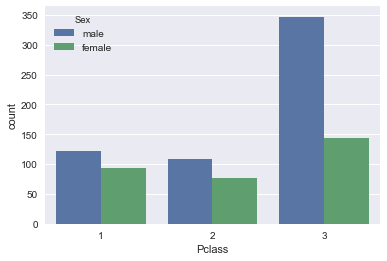

In [20]:
sns.countplot('Pclass',data=titanic_df,hue='Sex')

In [21]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [22]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [26]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


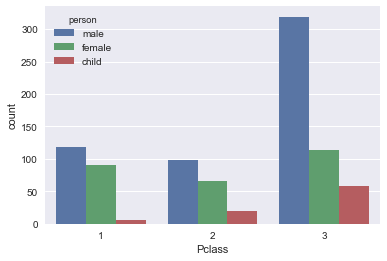

In [28]:
sns.countplot('Pclass',data=titanic_df,hue='person')

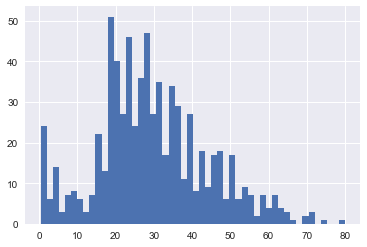

In [32]:
titanic_df['Age'].hist(bins=50)

In [33]:
titanic_df['Age'].mean()

29.69911764705882

In [34]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

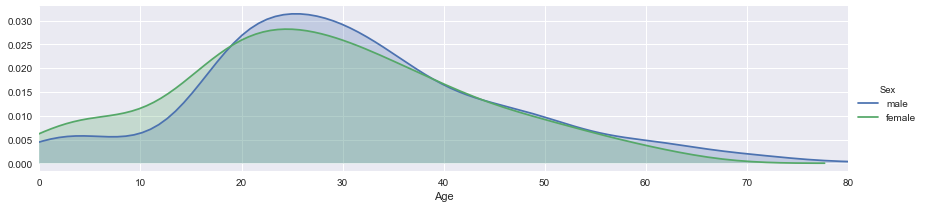

In [35]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

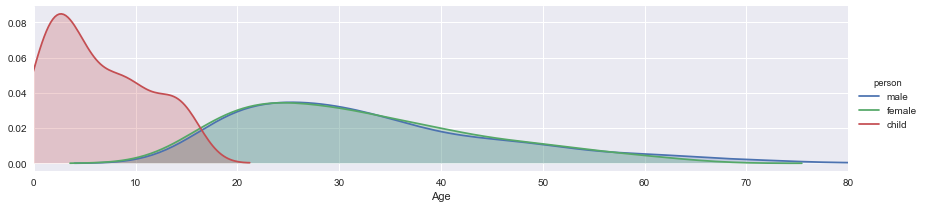

In [40]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

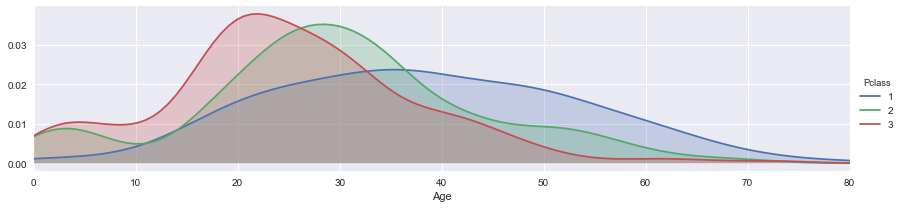

In [41]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [43]:
deck = titanic_df['Cabin'].dropna()

In [44]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

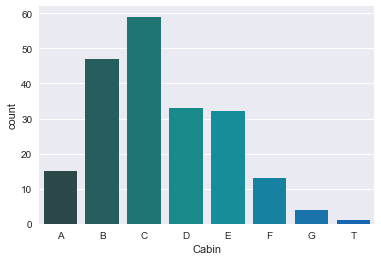

In [78]:
cabin_letter = []

for letter in deck:
    cabin_letter.append(letter[0])
    
alpha_cabin_letter = sorted(cabin_letter)

cabin_df = DataFrame(alpha_cabin_letter)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin',data=cabin_df,palette='winter_d')

In [75]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

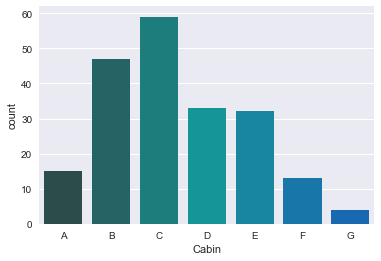

In [76]:
sns.countplot('Cabin',data=cabin_df,palette='winter_d')

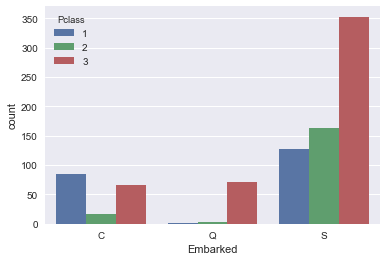

In [86]:
sns.countplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'])

In [88]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [89]:
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [90]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'


C:\Users\Arthur\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [91]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


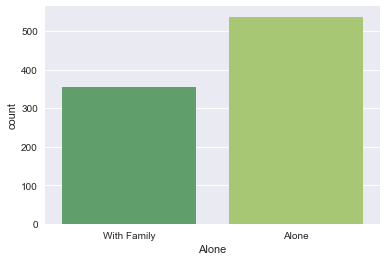

In [92]:
sns.countplot('Alone',data=titanic_df,palette='summer')

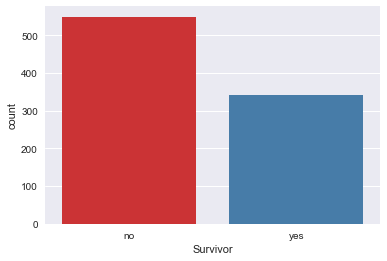

In [94]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.countplot('Survivor',data=titanic_df,palette='Set1')

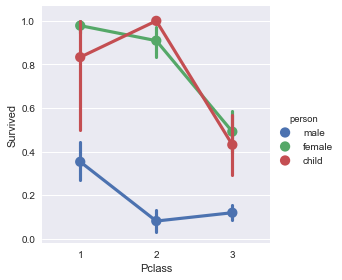

In [97]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

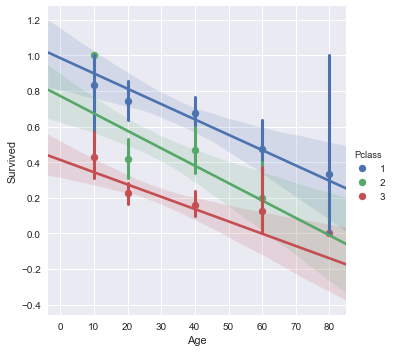

In [109]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=[10,20,40,60,80])

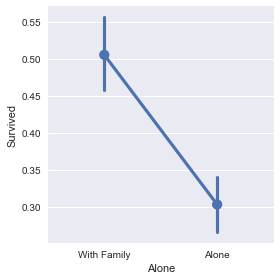

In [124]:
sns.factorplot('Alone','Survived',data=titanic_df)

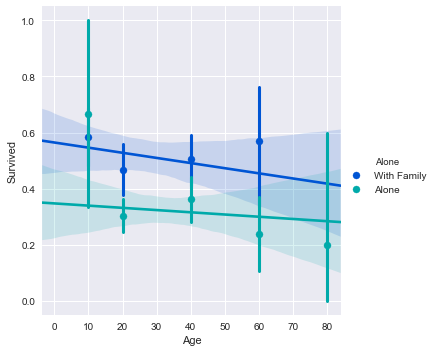

In [115]:
sns.lmplot('Age','Survived',hue='Alone',data=titanic_df,palette='winter',x_bins=[10,20,40,60,80])